## Библиотека pandas. Упражнения.

In [25]:
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
# Воспользуемся функцией isna(), результат которой просуммируем функций sum().  
pima.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
# выше мы определили, что пропуски присутствуют в дискретных признаках Glucose, BloodPressure, SkinThickness, Insulin и непрерывном BMI
# сформируем два списка с указанными именами признаков и посчитаем соответствующие медианы и средние, после чего заполним ими пропуски 
# в соответствующих столбцах и снова выведем количество оставшихся пропусков (чтобы убедиться, что их нет во всех столбцах)
discrete_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'] 
continuous_columns = ['BMI'] 

medians = pima[discrete_columns].median()
means = pima[continuous_columns].mean() 

pima.fillna(medians.to_dict(), inplace=True)
pima.fillna(means.to_dict(), inplace=True)
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
# т.к. в задании однозначно не указано, включать или нет в выборку женщин 50 лет, будем считать, что 50 в диапазон не включается 
((pima['Age']>50) & (pima['Class']==1)).sum()

38

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [7]:
pima.sort_values(by='Pregnancies', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [8]:
# т.к. в задании однозначно не указано, включать ли границы возрастного диапазона в условия выборки, будем считать, что они не включаются  
((pima['Age'] > 30) & (pima['Age'] < 40) & (pima['Pregnancies'] >=3)).sum() 

115

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
result = ((pima["BloodPressure"] >= 80) & (pima["BloodPressure"] <=89)).sum()  / pima.shape[0]
print(f'Нормальное давление у {result:.2%} женщин в выборке')  

Нормальное давление у 18.88% женщин в выборке


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
((pima['BMI'] >= 30) & (pima['BloodPressure'] > pima['BloodPressure'].mean())).sum()

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [23]:
pima[['Glucose', 'BloodPressure','Insulin', 'Class']] .groupby(by=['Class']).mean()

,Glucose,BloodPressure,Insulin
Class,,,
0,110.682000,70.920000,127.792000
1,142.130597,75.123134,164.701493


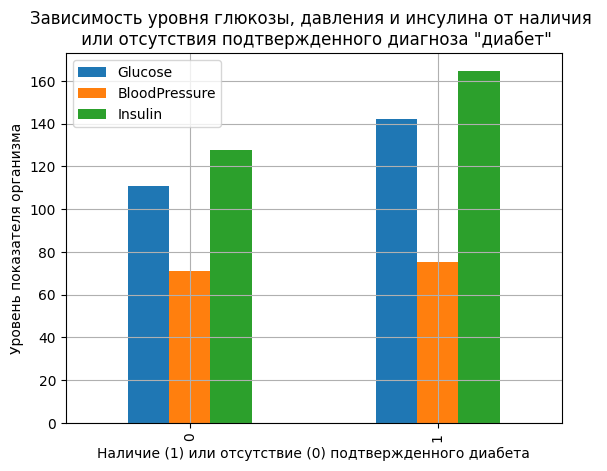

In [24]:
# видим, что у женщин с подтвержденным диабетом все три признака выше
# для наглядности визуализируем это с помощью диаграммы

pima[['Glucose', 'BloodPressure','Insulin', 'Class']] .groupby(by=['Class']).mean().plot.bar()
plt.title('Зависимость уровня глюкозы, давления и инсулина от наличия \n или отсутствия подтвержденного диагноза "диабет"')
plt.xlabel('Наличие (1) или отсутствие (0) подтвержденного диабета')
plt.ylabel('Уровень показателя организма')
plt.grid()

__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

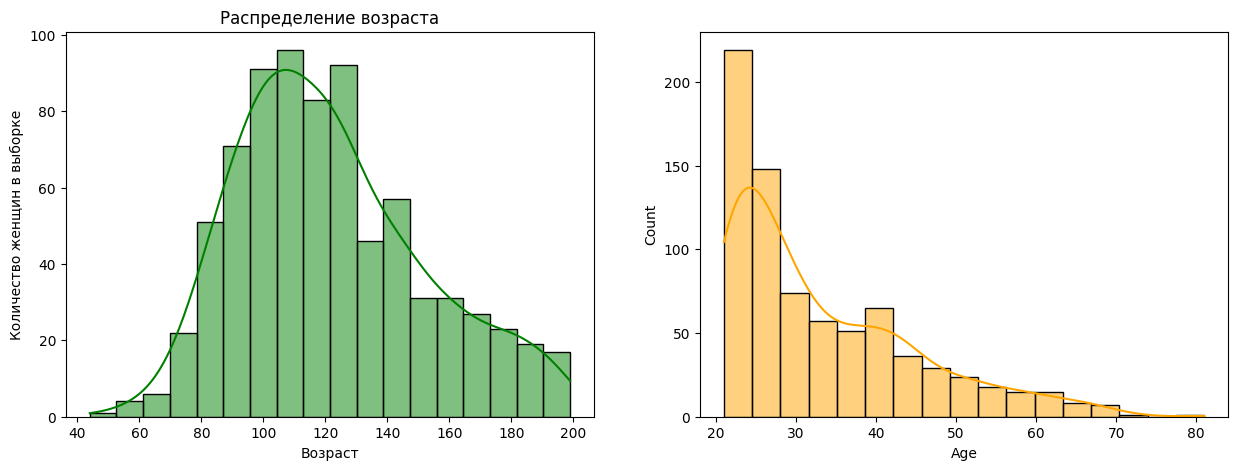

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data = pima, x = 'Glucose', color='green', kde=True, ax=ax[0])
ax[0].set_title('Распределение уровня глюкозы в крови')
ax[0].set_xlabel('Уровень глюкозы')
ax[0].set_ylabel('Количество женщин в выборке')

sns.histplot(data = pima, x = 'Age', color='orange', kde=True, ax=ax[1])
ax[0].set_title('Распределение возраста')
ax[0].set_xlabel('Возраст')
ax[0].set_ylabel('Количество женщин в выборке')
plt.show()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

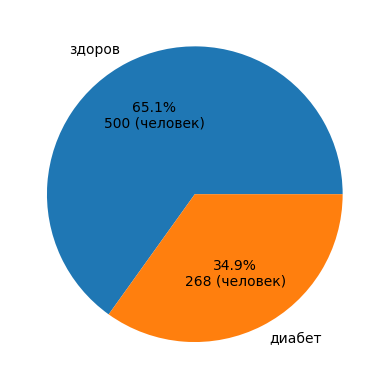

In [51]:
v_counts = pima['Class'].value_counts()
totals = v_counts.values.sum()

def format_count(x):
    return '{:.1f}%\n{:.0f} (человек)'.format(x, totals * x / 100)

labels = ['здоров' if v == 0 else 'диабет' for v in v_counts.index]
plt.pie(v_counts.values, labels=labels, autopct=format_count)

plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

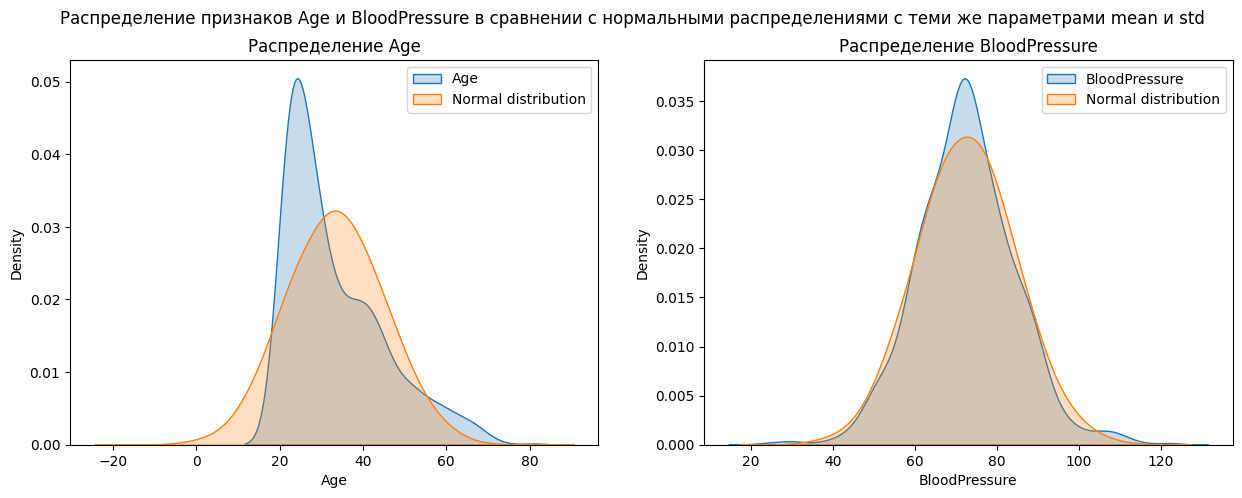

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.suptitle('Распределение признаков Age и BloodPressure в сравнении с нормальными распределениями с теми же параметрами mean и std')

cols = ('Age', 'BloodPressure')
for i in range(2):
    col = cols[i]
    
    sns.kdeplot(data=pima, x=col, label = col, fill=True, ax=ax[i])
    
    #для построения нормального распределения сгенерируем 10000 значений нормально распределенной 
    # случайной величины теми же значениями параметров mean и std
    normal_dist_values = norm.rvs(size=10000, loc=pima[col].mean(), scale=pima[col].std()) 
    sns.kdeplot(normal_dist_values, label = 'Normal distribution', bw_adjust=2, fill=True, ax=ax[i])
    
    ax[i].set_title(f'Распределение {col}')
    ax[i].legend()

plt.show()

"""Из графиков видно, что распределения возраста женщин в выборке существенно отличается от нормального, 
а распределение кровяного давление близко к нормальному, но тоже имеет отличия """

__Задание 13.__

Постройте следующий график: доля больных диабетом в зависимости от числа беременностей.

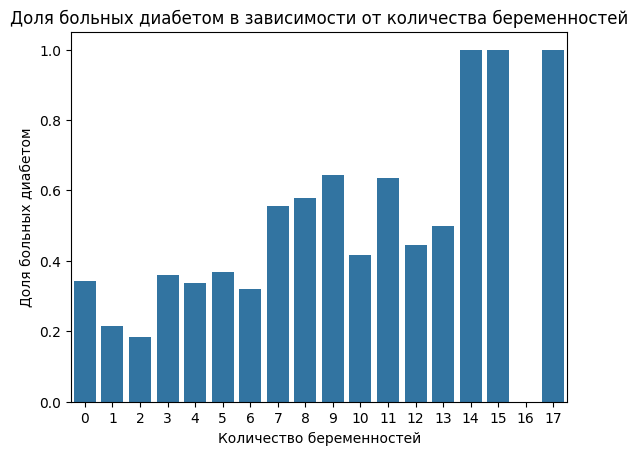

In [161]:
# сформируем новый фрейм, где для каждого значения признака Pregnancies будет записана доля больных диабетом женщин
diabetic_share = (
    pima
        .groupby('Pregnancies', as_index=False)['Class']
        .agg(lambda x: x.sum() / x.count())
        .rename(columns={'Class': 'DiabeticShare'})
)

# т.к. в выборке нет женщин с 16 беременностями (а диапазон значений - [0,17]), добавим во фрейм  
# строку для этого значения и укажем долю, равную None
share_for_absent_preg_count = pd.DataFrame({'Pregnancies' : [16], 'DiabeticShare' : [None]})
diabetic_share = pd.concat([diabetic_share, share_for_absent_preg_count], ignore_index=True).sort_values(by='Pregnancies', ascending=True)


# и построим bar plot, отражающий зависимость доли больных диабетом от количества беременностей 
sns.barplot(x = diabetic_share['Pregnancies'], y=diabetic_share['DiabeticShare'])
plt.xlabel('Количество беременностей')
plt.ylabel('Доля больных диабетом')
plt.title('Доля больных диабетом в зависимости от количества беременностей')
plt.show()

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [ ]:
pima['wasPregnant'] = pima['Pregnancies'].apply(lambda preg_count: 0 if preg_count == 0 else 1)

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [164]:
pima.groupby('wasPregnant')['Class'].agg(lambda c: c.sum() * 100/c.count())
"""По значениям видим, что процент больных диабетом примерно одинаковый, но для женщин,
которые были беременны, он слегка выше"""

wasPregnant
0    34.234234
1    35.007610
Name: Class, dtype: float64

__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [166]:
def body_type(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

pima['bodyType'] = pima['BMI'].apply(body_type)

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [179]:
healthy = pima[(pima['bodyType'] == "Normal weight") & (pima["BloodPressure"] >= 80) & (pima["BloodPressure"] <=89)]
result = healthy['Class'].sum() / healthy.shape[0]
print(f'Процент "здоровых" женщин, больных диабетом: {result:.2%}')  

Процент "здоровых" женщин, больных диабетом: 10.00%


# Датасет 2


In [180]:
babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)

## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет

2) Какое имя в датасете находится по индексом 121?

3) Cколько всего родилось детей по имени 'Aaron' за все время?

4) Насколько больше за все время родилось мальчиков чем девочек?

5) Cколько мальчиков родилось в 2010?

6) Сколько в датасете девочек по имени John?


In [198]:
# 1) Какие годы включает датасет
years = babies['year'].unique()

print(f'Датасет включает года от {years.min()} до {years.max()}.')
print(f'Количество уникальных значений - {len(years)}, что говорит о том, что в выборке есть данные по всем годам в указанном диапазоне.')

Датасет включает года от 1880 до 2010.
Количество уникальных значений - 131, что говорит о том, что в выборке есть данные по всем годам в указанном диапазоне.


In [242]:
# 2) Какое имя в датасете находится по индексом 121?
print(f'Под индексом 121 в датасете находится имя {babies.iloc[121]["name"]}')

Под индексом 121 в датасете находится имя Ann


In [220]:
# 3) Сколько всего родилось детей по имени 'Aaron' за все время?
print(f'За все время родилось {babies[babies["name"]=="Aaron"]["number"].sum()} детей по имени Aaron ')

За все время родилось 527668 детей по имени Aaron 


In [222]:
# 4) Насколько больше за все время родилось мальчиков чем девочек?
res = babies[babies['sex']=='M']['number'].sum() - babies[babies['sex']=='F']['number'].sum()
print(f'За все время мальчиков родилось на {res} больше, чем девочек')

За все время мальчиков родилось на 2422447 больше, чем девочек


In [226]:
# 5) Сколько мальчиков родилось в 2010?
res = babies[(babies['sex'] == 'M') & (babies['year'] == 2010)]['number'].sum()
print(f'В 2010 году родилось {res} мальчиков')

В 2010 году родилось 1898382 мальчиков


In [238]:
#6) Сколько в датасете девочек по имени John?
res_data = babies[(babies['sex'] == 'F') & (babies['name'] == 'John')]['number']
print(f'В датасете имеется информация о {res_data.sum()} девочках по имени John')
print(f'В то же время количество записей в датасете о девочках по имени John равно {res_data.count()}, что \n'
      f'говорит о том, что девочки с таким именем наблюдались каждый год за весь период наблюдений')

В датасете имеется информация о 21578 девочках по имени John
В то же время количество записей в датасете о девочках по имени John равно 131, что 
говорит о том, что девочки с таким именем наблюдались каждый год за весь период наблюдений


## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


In [343]:
# 1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

# сгруппируем датасет по году и полу и сразу рассчитаем количество рожденных детей в группах, 
# т.к. именно эти значения на будут нужны для визуализации трендов рождаемости с помощью линейных графиков  
babies_born_by_year_and_gender = babies.groupby(['year', 'sex'], as_index=False).agg({'number':'sum'})

# и разобьем датасет на два, как сказано в задании
girls_born_by_year = babies_born_by_year_and_gender[babies_born_by_year_and_gender['sex'] == 'F']
boys_born_by_year = babies_born_by_year_and_gender[babies_born_by_year_and_gender['sex'] == 'M']

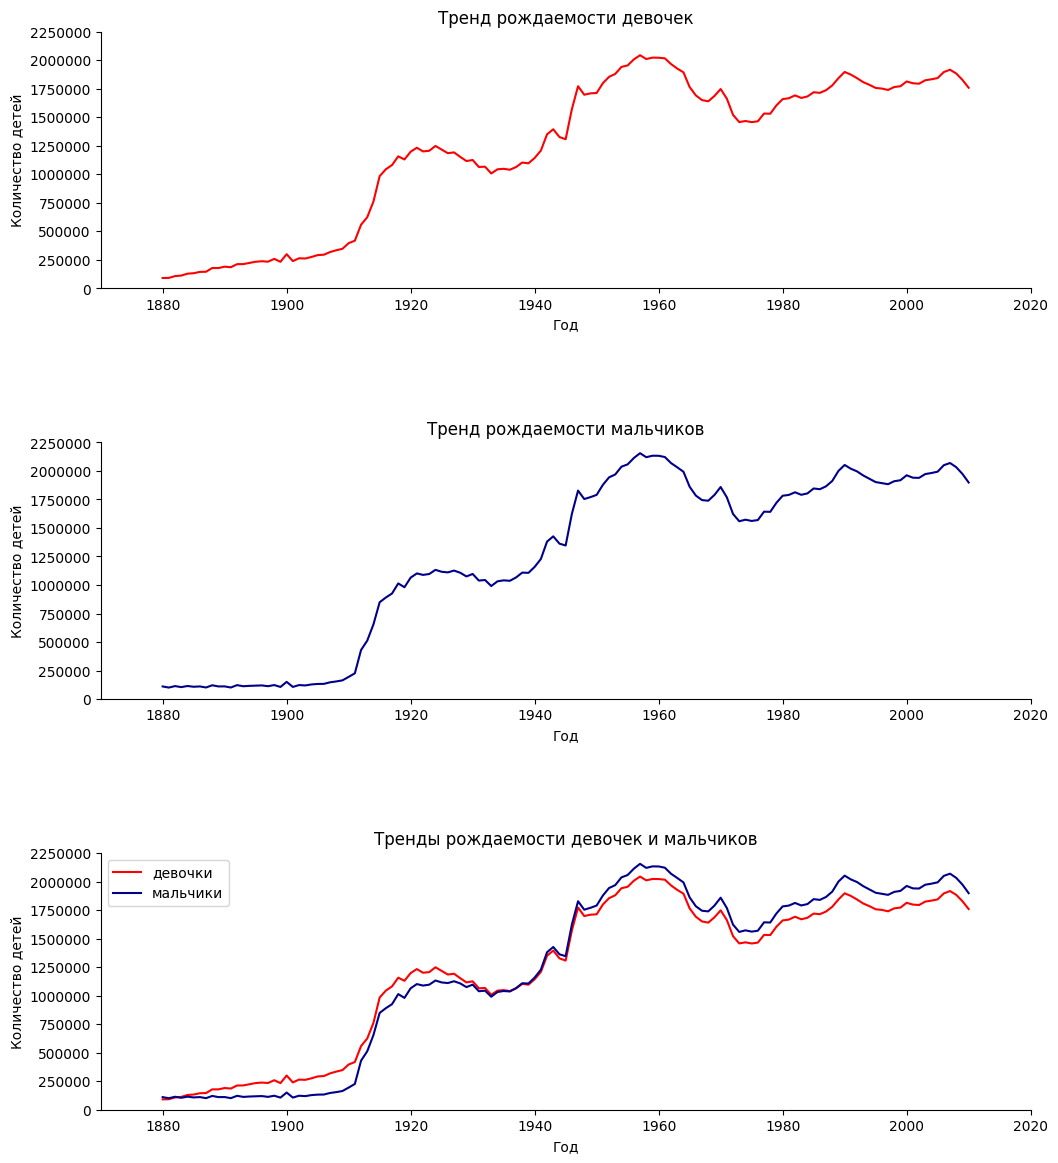

In [344]:
# 2. Создайте фигуру matplotlib с 3 графиками один под другим.
fig, ax = plt.subplots(3, 1, figsize=(12,14))
fig.subplots_adjust(hspace=0.6)

# 3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, 
# второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных 
# графиках). Годы - x, количество детей - y. 
sns.lineplot(data=girls_born_by_year, x='year', y='number', color='red',  ax=ax[0])

sns.lineplot(data=boys_born_by_year, x='year', y='number', color='darkblue',  ax=ax[1])

sns.lineplot(data=girls_born_by_year, x='year', y='number', color='red', label='девочки',  ax=ax[2])
sns.lineplot(data=boys_born_by_year, x='year', y='number', color='darkblue',  label='мальчики', ax=ax[2])

# 4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, 
# третий график должен содержать легенду, шкалы графиков должны быть подписаны.
# 5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
sns.despine(fig=fig, top=True, right=True)
axes_infos = ((ax[0], 'Тренд рождаемости девочек'), (ax[1], 'Тренд рождаемости мальчиков'), (ax[2], 'Тренды рождаемости девочек и мальчиков'))

for ax, title in axes_infos:
    ax.set_xlim(1870, 2020)
    ax.set_ylim(0, 2250000)
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество детей')
    ax.set_title(title)

6. Кратко опишите тренды в ячейке markdown под графиками.

Тренды рождаемости мальчиков и девочек выглядят довольно похоже. Рождаемость существенно выросла в период примерно с 1910 до 1920 года, после чего немного снижалась и примерно к 1935 году достигла локального минимума, после чего опять перешла к росту на периоде плоть до 1960 года. После этого она начала снижаться, достигнув локального минимума в районе 1975 года, после чего начала расти. Но пика 1960 года так и не достигла

Отличие трендов рождаемости мальчиков и девочек заключается в том, что до примерно 1935 года девочек рождалось чуть больше, но потом картина поменялась и количество рождающихся мальчиков стало чуть больше. 

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.

In [438]:
# 1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
# 2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

""" сгруппируем датасет по полу и имени и для каждой такой пары рассчитаем количество рожденных с соответствующим именем и полом детей, 
после чего отсортируем полученный датасет по этому количеству в убывающем порядке """
babies_number_by_gender_and_name = babies.groupby(['sex', 'name'], as_index=False).agg({'number' : 'sum'}).sort_values('number', ascending=False)

"""получим топ 2 мужских и топ 2 женских имен""" 
top_names = []
gender_values = ('M', 'F')
for gender in gender_values: 
    top_names.extend(babies_number_by_gender_and_name[babies_number_by_gender_and_name['sex'] == gender]['name'].head(2))

print('Самые популярные мужские имена: ', ", ".join(top_names[:2]))
print('Самые популярные женские имена: ', ", ".join(top_names[2:]))

Самые популярные мужские имена:  James, John
Самые популярные женские имена:  Mary, Patricia


In [450]:
"""для найденных 4 имен создадим словари, которые будут содержать как информацию, необходимую для отображения тренда 
по имени на графике, так и сам датасет с информацией о количестве мальчиков или девочек с этим именем, рожденных в разные годы""" 
def get_top_names_data(use_gender_filter: bool = True):
    result = []
    for i in range(4):

        data_filter = (babies['name'] == top_names[i])
        if use_gender_filter: 
            data_filter = data_filter & (babies['sex'] == gender_values[i // 2])
        
        df = (babies[data_filter]
              .groupby(['name', 'year'], as_index=False)
              .agg({'number' : 'sum'})
              )
        result.append({
            'gender': gender_values[i // 2],
            'place' : (i % 2) + 1,  
            'name' : top_names[i],
            'data_frame' : df,  
        })
    return result

top_names_data = get_top_names_data(False)

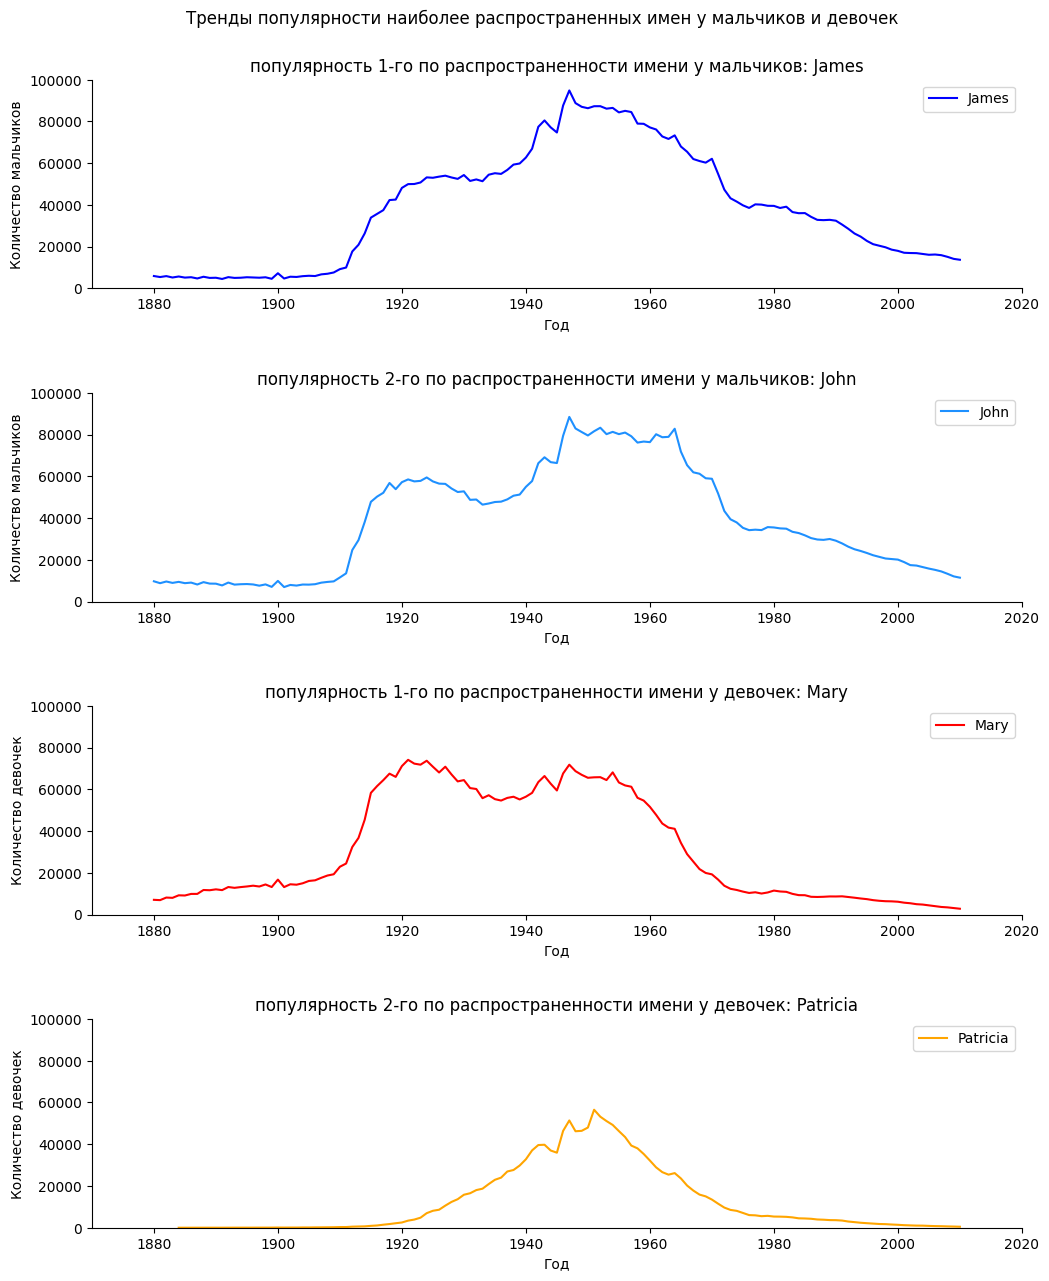

In [469]:
# 3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
# 4. Постройте 4 линейных графика - тренд для каждого имени за все время.
# 5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
# 6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
colors = ['blue', 'dodgerblue', 'red', 'orange']
def draw_figures():
    fig, ax = plt.subplots(4, 1, figsize=(12,14))
    fig.subplots_adjust(top=0.93, hspace=0.5)
    fig.suptitle('Тренды популярности наиболее распространенных имен у мальчиков и девочек')
    
    
    for i in range(4): 
        name_data = top_names_data[i]
        
        sns.lineplot(data=name_data['data_frame'], x='year', y='number', color=colors[i], label=name_data['name'], ax=ax[i])
        ax[i].set_xlim(1870, 2020)
        ax[i].set_ylim(0, 100000)
        ax[i].set_xlabel('Год')
        ax[i].set_ylabel(f'Количество {"мальчиков" if name_data["gender"] == "M" else "девочек"}')
        ax[i].set_title(f'популярность {name_data["place"]}-го по распространенности имени у {"мальчиков" if name_data["gender"] == "M" else "девочек"}: {name_data["name"]}')

    sns.despine(fig=fig, top=True, right=True)

draw_figures()

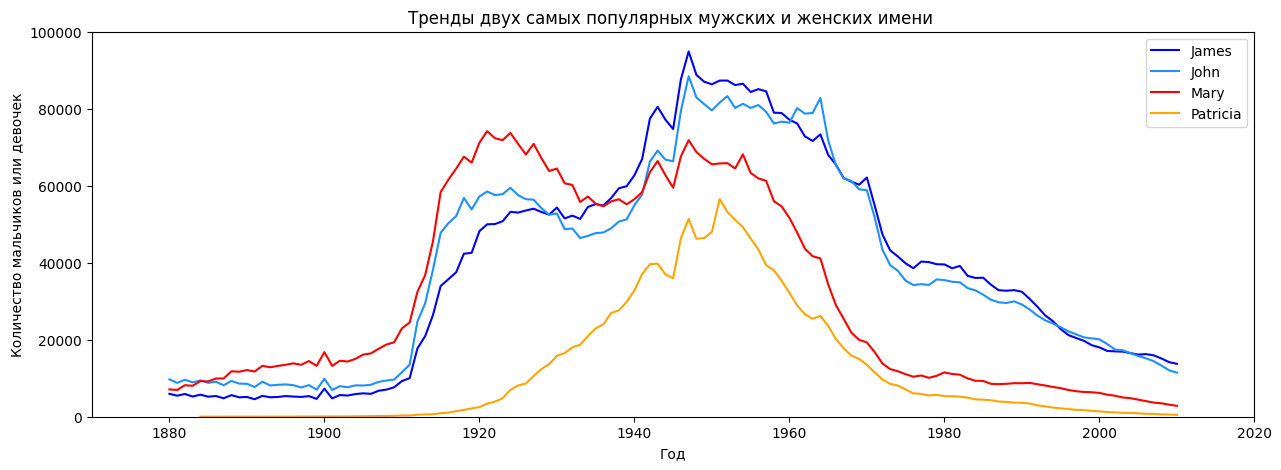

In [470]:
# 7. Опишите тренды в ячейке markdown под графиками.
plt.figure(figsize=(15,5))
for i in range(4): 
    name_data = top_names_data[i]
    sns.lineplot(data=name_data['data_frame'], x='year', y='number', color=colors[i], label=name_data['name'])
plt.xlim(1870, 2020)
plt.ylim(0, 100000)
plt.xlabel('Год')
plt.ylabel(f'Количество мальчиков или девочек')
plt.title('Тренды двух самых популярных мужских и женских имени ')

sns.despine(fig=fig, top=True, right=True)